In [1]:
import csv

import pandas as pd
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load dataset

In [2]:
df = pd.read_csv("./Telco-Customer-Churn.csv")

# Exploratory Data Analysis

## Initial statistics
- Outputting column info (name, data type, values)
- Dataset statistics (count, mean, standard deviation, min, max, quartiles)

In [3]:
sns.set_palette("viridis")

# Column info
for col in df.columns:
    print('Column:', col, '\t', df[col].dtype)
    print(df[col].unique())
    print() 

Column: customerID 	 object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender 	 object
['Female' 'Male']

Column: SeniorCitizen 	 int64
[0 1]

Column: Partner 	 object
['Yes' 'No']

Column: Dependents 	 object
['No' 'Yes']

Column: tenure 	 int64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService 	 object
['No' 'Yes']

Column: MultipleLines 	 object
['No phone service' 'No' 'Yes']

Column: InternetService 	 object
['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity 	 object
['No' 'Yes' 'No internet service']

Column: OnlineBackup 	 object
['Yes' 'No' 'No internet service']

Column: DeviceProtection 	 object
['No' 'Yes' 'No internet service']

Column: TechSupport 	 object
['No' 'Yes' 'No internet service']

Column: StreamingTV 	 object
['No' 'Yes

In [4]:
# Display basic information about the dataset
print("Dataset info")
df.info()

# Summary statistics for numerical columns
print("\nDataset statistics")
print(df.describe())

# Check for missing values
print("\nDataset null values")
print(df.isnull().sum())

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nu

In [5]:
# Defining types of columns
categorical_columns = ['InternetService', 'OnlineSecurity', 'MultipleLines',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
two_value_columns = ['gender']

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

columns = list(set(categorical_columns).union(yes_no_columns, two_value_columns))

## Plots

<Axes: xlabel='gender', ylabel='MonthlyCharges'>

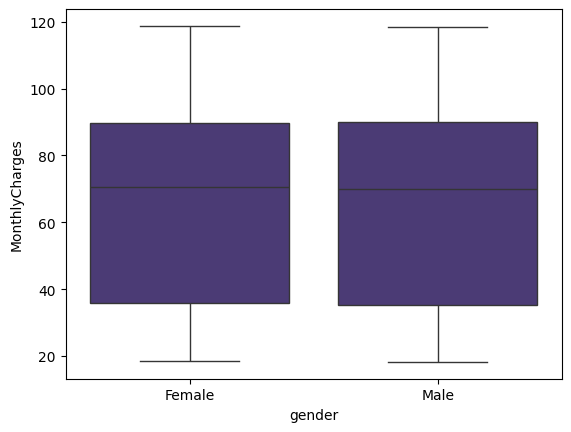

In [6]:
# Monthly charges distribution by age
sns.boxplot(data=df, x="gender", y="MonthlyCharges")

<Axes: xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

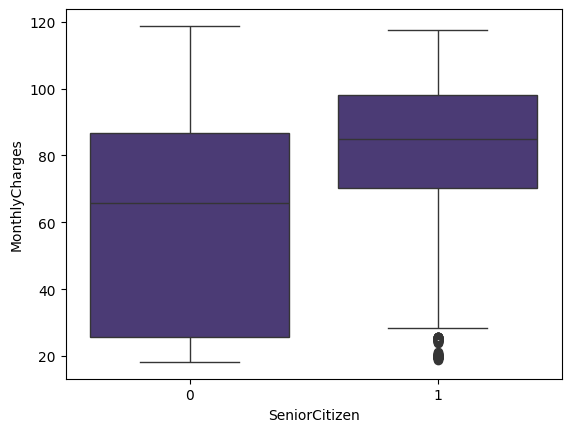

In [7]:
# Distribution of monthly charges of senior and non-senior customers
sns.boxplot(data=df, x="SeniorCitizen", y="MonthlyCharges")

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

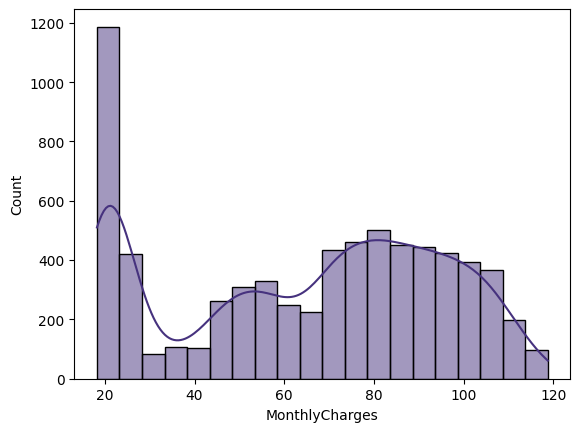

In [8]:
# Distribution of monthly charges of customers
sns.histplot(data=df, x="MonthlyCharges", bins=20, kde=True)

<Axes: xlabel='Churn', ylabel='count'>

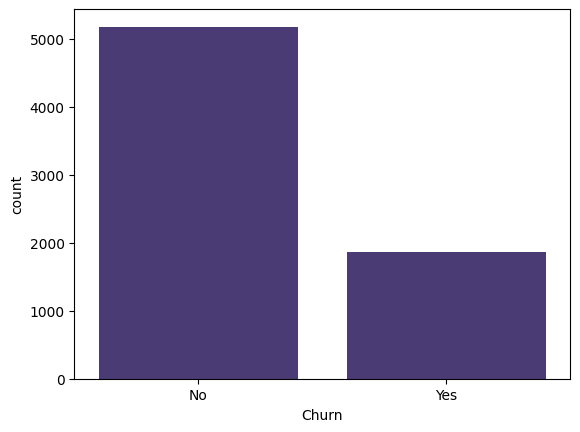

In [9]:
# Plot the distribution of the target variable
sns.countplot(data=df, x='Churn')

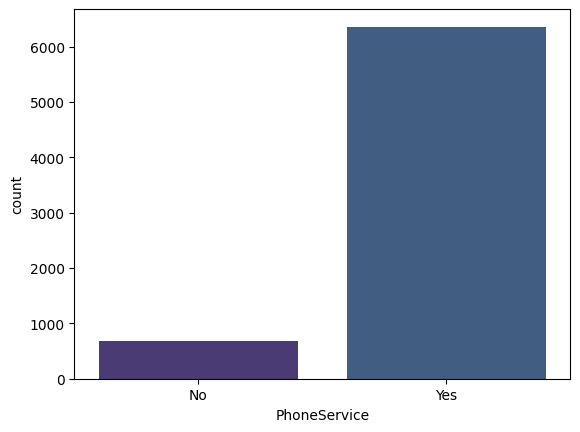

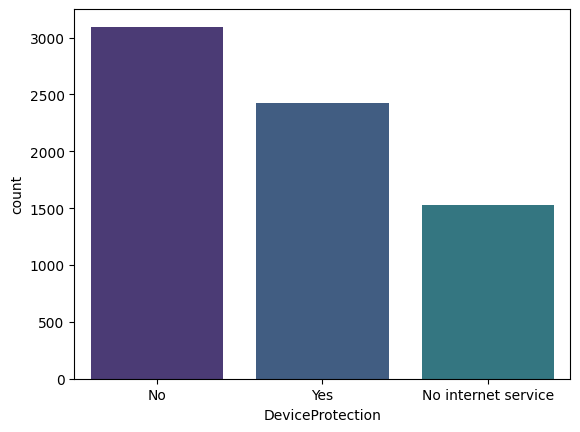

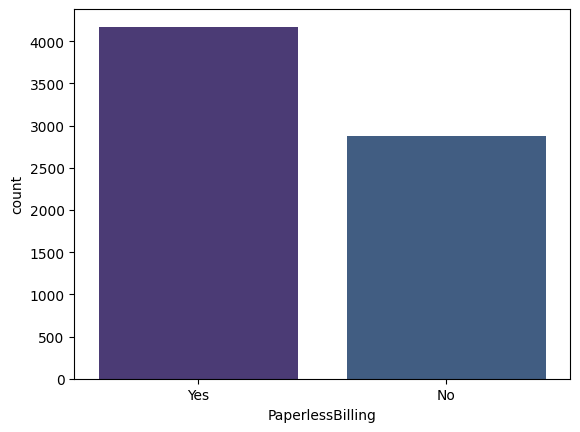

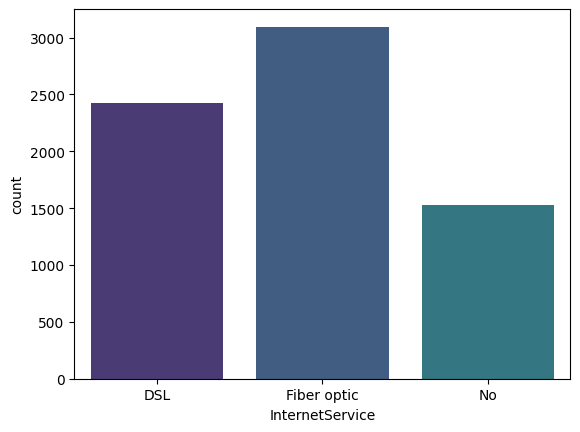

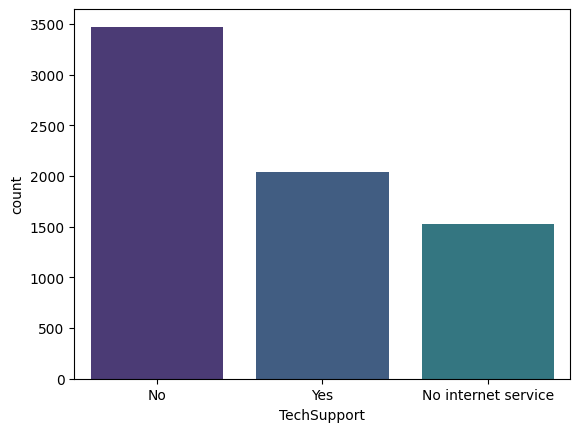

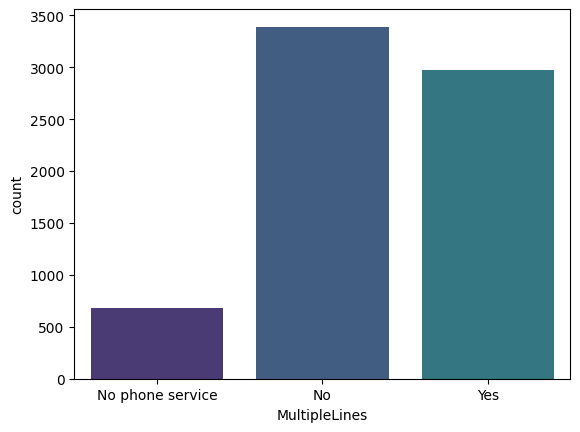

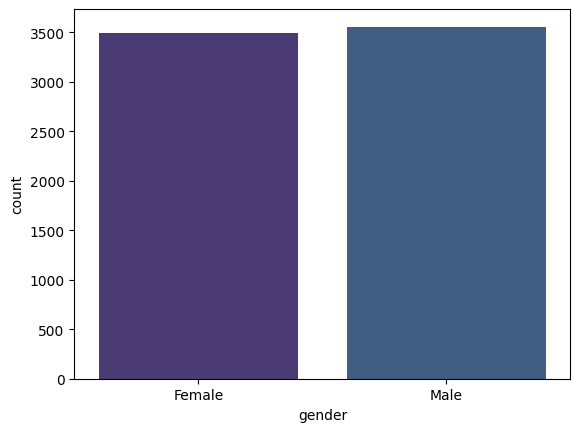

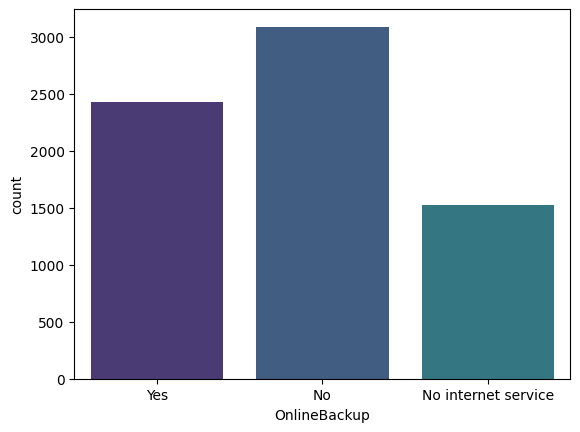

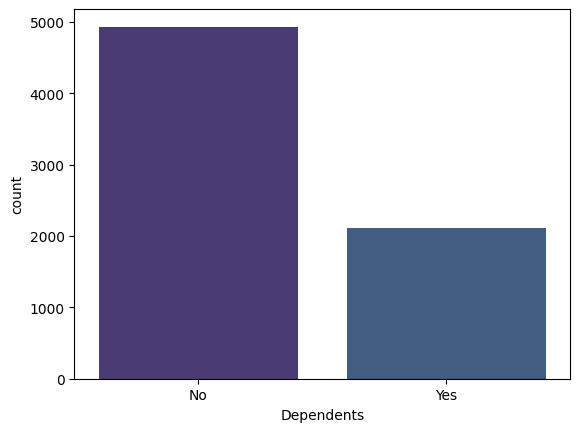

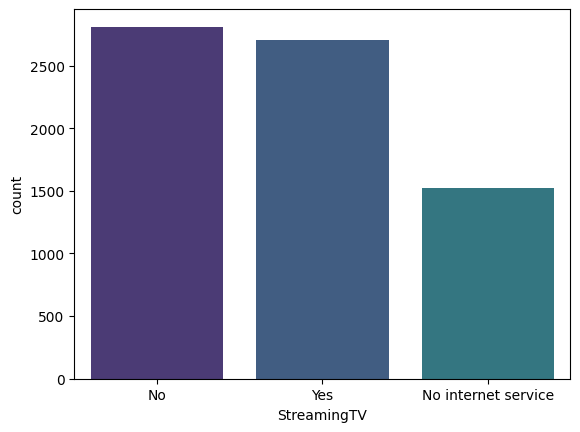

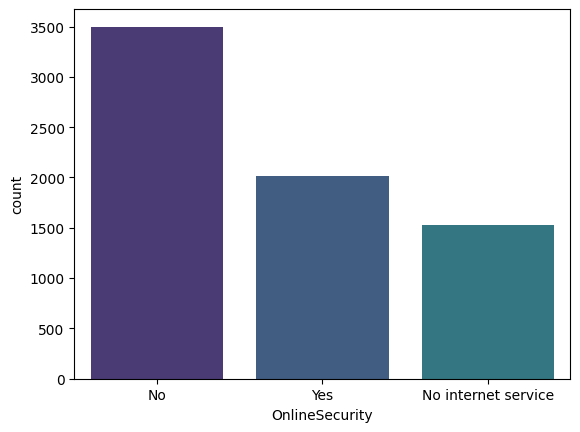

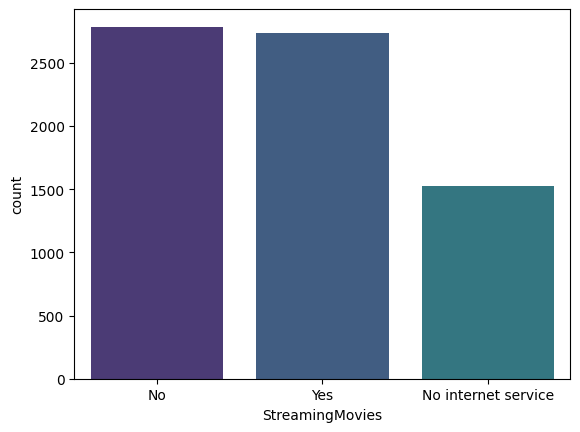

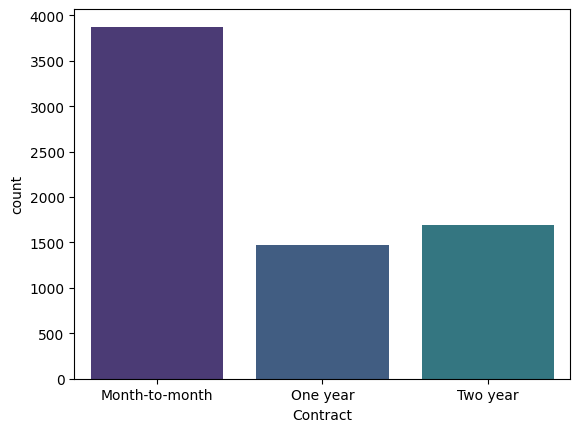

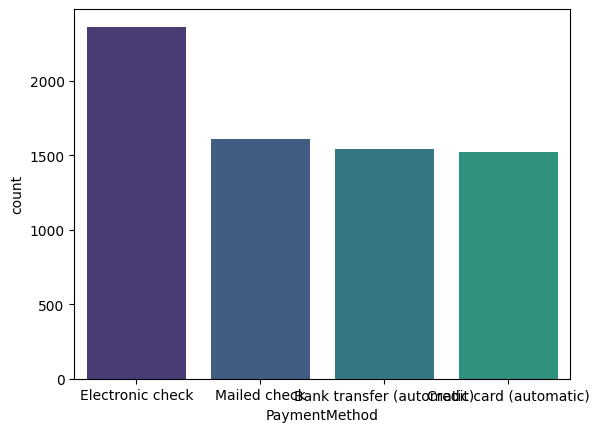

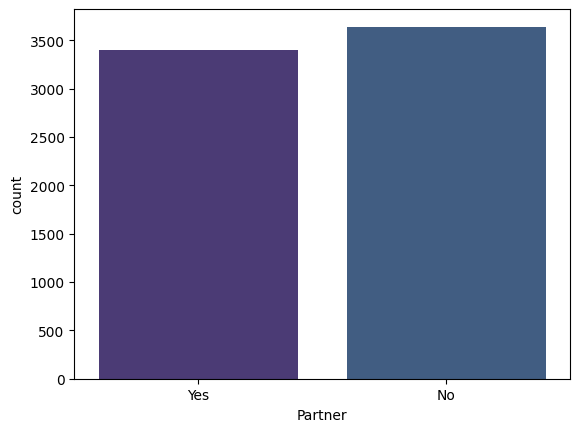

In [10]:
# Plot the distribution of categorical features
for column in columns:
  sns.countplot(data=df, x=column, hue=column)
  plt.show()

## Correlation Matrix

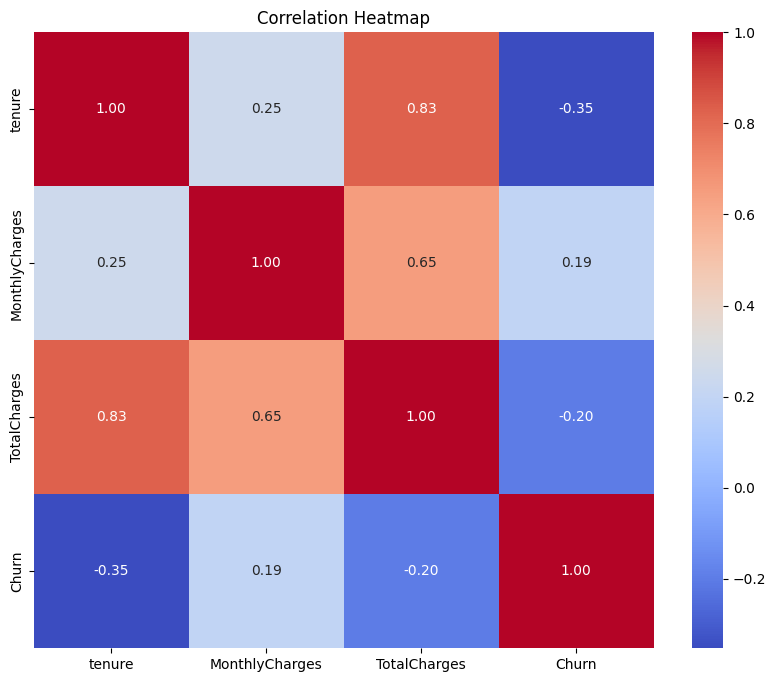

In [11]:
# Convert Churn column from Yes/No to Binary 0/1
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

corr_matrix = df[numerical_columns + ["Churn"]].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Data cleaning

In [12]:
# Removes customerID column
if 'customerID' in df.columns:
  df = df.drop(columns=['customerID'])

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

for column in yes_no_columns:
  df[column] = df[column].map({'Yes': 1, 'No': 0})
  
def one_hot_encode(column_data):
  classes = column_data.unique()
  column_data = column_data.map({c: i for i, c in enumerate(classes)})
  return np.array(keras.utils.to_categorical(column_data, num_classes=len(classes)))
    
# Convert categorical columns to one-hot encoding
for column in categorical_columns:
  num_classes = len(df[column].unique())
  one_hot = one_hot_encode(df[column])
  df[column] = one_hot

# Converts boolean columns to 0/1
df = df.map(lambda x: 1 if x is True else (0 if x is False else x))

# Converts numerical columns to numeric
numerical_columns = df.columns.difference(categorical_columns)
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
df = df.fillna(0)

for col in df.columns:
    print('Column:', col, '\t', df[col].dtype)
    print(df[col].unique())
    print() 

assert all(df.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.number))), "Not all columns are numeric!"

# Check the results
print(df.head())

Column: gender 	 int64
[1 0]

Column: SeniorCitizen 	 int64
[0 1]

Column: Partner 	 int64
[1 0]

Column: Dependents 	 int64
[0 1]

Column: tenure 	 int64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService 	 int64
[0 1]

Column: MultipleLines 	 float64
[1. 0.]

Column: InternetService 	 float64
[1. 0.]

Column: OnlineSecurity 	 float64
[1. 0.]

Column: OnlineBackup 	 float64
[1. 0.]

Column: DeviceProtection 	 float64
[1. 0.]

Column: TechSupport 	 float64
[1. 0.]

Column: StreamingTV 	 float64
[1. 0.]

Column: StreamingMovies 	 float64
[1. 0.]

Column: Contract 	 float64
[1. 0.]

Column: PaperlessBilling 	 int64
[1 0]

Column: PaymentMethod 	 float64
[1. 0.]

Column: MonthlyCharges 	 float64
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

Column: TotalCharges 	 float64
[  29.85 1889.5   108.15 ... 

# Create training dataset

In [13]:
# Flatten each row
def flatten_row(row):
  expanded_row = []
  for item in row:
      if isinstance(item, np.ndarray):  # Check if it's a NumPy array
          expanded_row.extend(item)  # Expand the array
      else:
          expanded_row.append(item)  # Append non-array items as-is
  return pd.Series(expanded_row)

scaler = StandardScaler()
# Normalize numerical columns
numerical_columns_data = numerical_columns.difference(['Churn'])
df[numerical_columns_data] = scaler.fit_transform(df[numerical_columns_data])

# Expands the one-hot encoded columns
dataset = df.apply(flatten_row, axis=1).to_numpy()

In [14]:
np.random.shuffle(dataset)

# Split the dataset into features and target
data = dataset[:, :-1]
target = dataset[:, -1]

In [15]:
# 80/20 dataset split
split = int(len(dataset) * 0.8)

train, target_train = data[:split], target[:split]
test, target_test = data[split:], target[split:]

In [16]:
save_csv_path = "./model_metrics.csv"

# Metrics saver
class DataSaver(keras.callbacks.Callback):
    def __init__(self, save_path):
        super(DataSaver, self).__init__()
        self.save_path = save_path
        self.csvfile = open(save_path, 'w', newline='')
        header = ["Epoch", "Train accuracy", "Test accuracy", "Train loss", "Test loss"]
        self.writer = csv.DictWriter(self.csvfile, fieldnames=header)
        self.writer.writeheader()

    def on_epoch_end(self, epoch, logs=None):
        # Writes the metrics to a CSV file
        self.writer.writerow({
            "Epoch": epoch + 1,
            "Train accuracy": logs["accuracy"],
            "Test accuracy": logs["val_accuracy"],
            "Train loss": logs["loss"],
            "Test loss": logs["val_loss"]
        })

    def on_train_end(self, logs=None):
        self.csvfile.close()
        
        
# Classification model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=train.shape[1]),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

saver = DataSaver(save_csv_path)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training
history = model.fit(train, target_train, epochs=100, batch_size=64, validation_data=(test, target_test), callbacks=[saver, early_stopping])

Epoch 1/100


c:\Users\alang\anaconda3\envs\CIS3190\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6184 - loss: 0.6449 - val_accuracy: 0.8006 - val_loss: 0.4524
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - loss: 0.4909 - val_accuracy: 0.8190 - val_loss: 0.4141
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 0.4656 - val_accuracy: 0.8162 - val_loss: 0.4143
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7916 - loss: 0.4360 - val_accuracy: 0.8148 - val_loss: 0.4155
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7757 - loss: 0.4602 - val_accuracy: 0.8155 - val_loss: 0.4124
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.4371 - val_accuracy: 0.8190 - val_loss: 0.4112
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4397 - val_accuracy: 0.8126 - val_loss: 0.4143
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4419 - val_accuracy: 0.8119 - val_loss: 0.4

# Post factum Analysis

[]

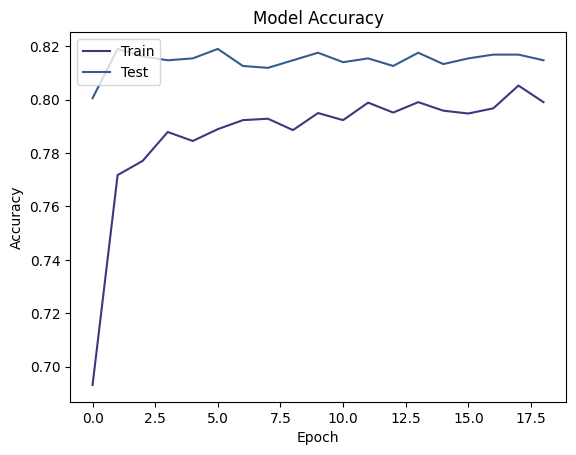

In [17]:
# Accuracy plot
sns.lineplot(data=history.history["accuracy"], label="Train")
sns.lineplot(data=history.history["val_accuracy"], label="Test")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.plot()

[]

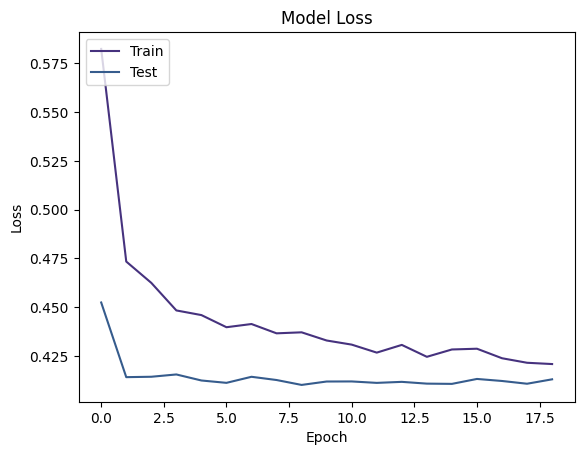

In [18]:
# Loss plot
sns.lineplot(data=history.history["loss"], label="Train")
sns.lineplot(data=history.history["val_loss"], label="Test")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper left")
plt.plot()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


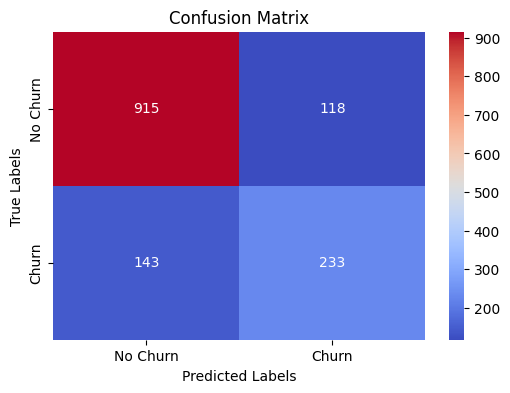

In [19]:
# Confusion matrix
true = target_test
predictions = np.round(model.predict(test).flatten(), decimals=0)
conf_matrix = confusion_matrix(true, predictions)

labels=["No Churn", "Churn"]
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()